In [3]:
## 基础函数库
import numpy as np
import pandas as pd
import graphviz
## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns
## 我们利用 Pandas 自带的 read_csv 函数读取并转化为 DataFrame 格式，这里要注意修改一下你自己文件的位置，要不然导入不进来
data = pd.read_csv('./penguins_raw.csv')
## 为了方便我们仅选取四个简单的特征，有兴趣的同学可以研究下其他特征的含义以及使用方法
data = data[['Species','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]

In [4]:
## 利用.info()查看数据的整体信息
data.info()
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
data.head()
data = data.fillna(-1)
data.tail()
## 其对应的类别标签为'Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'三种不同企鹅的类别。
data['Species'].unique()
'''为了方便我们将标签转化为数字
'Adelie Penguin (Pygoscelis adeliae)' ------0
'Gentoo penguin (Pygoscelis papua)' ------1
'Chinstrap penguin (Pygoscelis antarctica) ------2
'''
def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2
data['Species'] = data['Species'].apply(trans)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split
## 选择其类别为 0 和 1 的样本 （不包括类别为 2 的样本）
data_target_part = data[data['Species'].isin([0,1])][['Species']]
data_features_part = data[data['Species'].isin([0,1])][['Species','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
## 测试集大小为 20%， 80%/20%分（请补全缺失代码）
# 测试集大小为 20%， 80%/20%分（请补全缺失代码）
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data_features_part, 
    data_target_part, 
    test_size=0.2, 
    random_state=42,
    stratify=data_target_part  # 确保类别分布一致
)
## 从 sklearn 中导入决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## 定义 决策树模型
clf = DecisionTreeClassifier(criterion='entropy')
# 在训练集上训练决策树模型（请补全缺失代码）

# 定义 决策树模型，添加减枝参数
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,            # 设置树的最大深度
    min_samples_split=10,   # 设置内部节点再划分所需最小样本数
    min_samples_leaf=5      # 设置叶子节点最小样本数
)

# 在训练集上训练决策树模型（请补全这句缺失的代码）
clf.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[31  0]
 [ 0 25]]


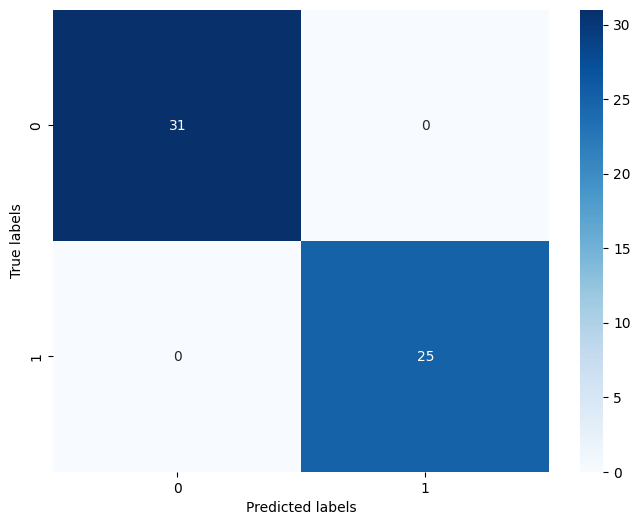

In [8]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("penguins")
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics
## 利用 accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】
# 评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))
## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()